<a href="https://colab.research.google.com/github/srita2003/ML_Practicals/blob/main/ML_Prac3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn pandas matplotlib seaborn

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")

In [6]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [8]:
X = df.drop('churn', axis=1)
y = df['churn']

In [9]:
X = pd.get_dummies(X, drop_first=True)

In [10]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Classification: Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
log_y_pred = log_reg.predict(X_test)


In [14]:
# Classification: Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)

In [15]:
# Classification Metrics
def print_classification_metrics(model_name, y_true, y_pred):
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"Precision: {precision_score(y_true, y_pred):.2f}")
    print(f"Recall: {recall_score(y_true, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_true, y_pred):.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\n")

In [16]:
print_classification_metrics("Logistic Regression", y_test, log_y_pred)
print_classification_metrics("Random Forest Classifier", y_test, rf_y_pred)

Logistic Regression Metrics:
Accuracy: 0.81
Precision: 0.55
Recall: 0.20
F1 Score: 0.29
Confusion Matrix:
[[1543   64]
 [ 315   78]]


Random Forest Classifier Metrics:
Accuracy: 0.87
Precision: 0.76
Recall: 0.48
F1 Score: 0.58
Confusion Matrix:
[[1547   60]
 [ 206  187]]




In [17]:
# ROC-AUC for classification
log_roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
rf_roc_auc = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])
print(f"Logistic Regression ROC-AUC: {log_roc_auc:.2f}")
print(f"Random Forest Classifier ROC-AUC: {rf_roc_auc:.2f}")

Logistic Regression ROC-AUC: 0.78
Random Forest Classifier ROC-AUC: 0.87


<ipython-input-22-e5c0d66b0915>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label="No Skill Line", color="red")


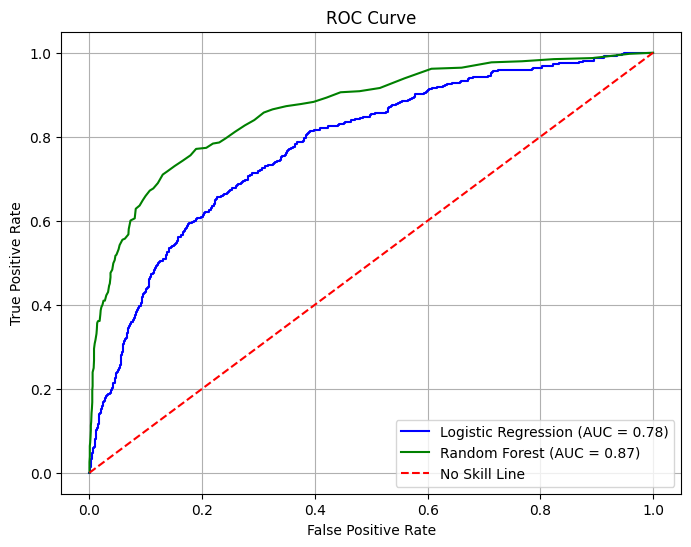

In [22]:
from sklearn.metrics import roc_curve, auc

# Logistic Regression
lr_probs = log_reg.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_auc = auc(lr_fpr, lr_tpr)

# Random Forest Classifier
rf_probs = rf_clf.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_auc:.2f})", color="blue")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})", color="green")
plt.plot([0, 1], [0, 1], 'k--', label="No Skill Line", color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()

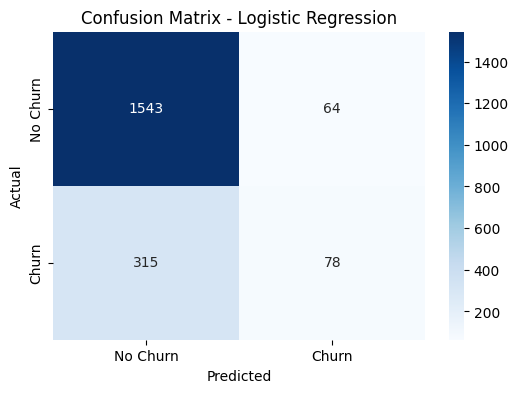

In [24]:
# Confusion Matrix Visualization
# Logistic Regression Confusion Matrix
lr_preds = log_reg.predict(X_test)
lr_cm = confusion_matrix(y_test, lr_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

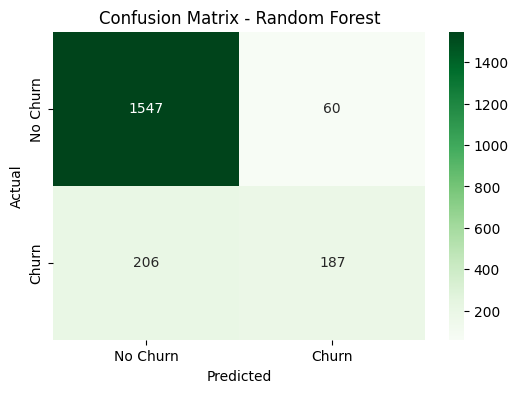

In [26]:
# Random Forest Confusion Matrix
rf_preds = rf_clf.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens', xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [30]:
# Regression: Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_y_pred = lin_reg.predict(X_test)


In [31]:
# Regression: Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
rf_y_pred = rf_reg.predict(X_test)

In [32]:
# Regression Metrics
def print_regression_metrics(model_name, y_true, y_pred):
    print(f"{model_name} Metrics:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print("\n")

print_regression_metrics("Linear Regression", y_test, lin_y_pred)
print_regression_metrics("Random Forest Regressor", y_test, rf_y_pred)

Linear Regression Metrics:
MAE: 0.28
MSE: 0.13
RMSE: 0.36


Random Forest Regressor Metrics:
MAE: 0.21
MSE: 0.10
RMSE: 0.32


